## Regressão Linear utilizando Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Base de dados :

In [2]:
customers = pd.read_csv("Ecommerce Customers.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Ecommerce Customers.csv'

In [ ]:
customers.head()

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Descrição dos campos da base de dados :

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

## Objetivo do modelo: estimar o valor da variável "Yearly Amount Spent" !

## Análise exploratória da base de dados :

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

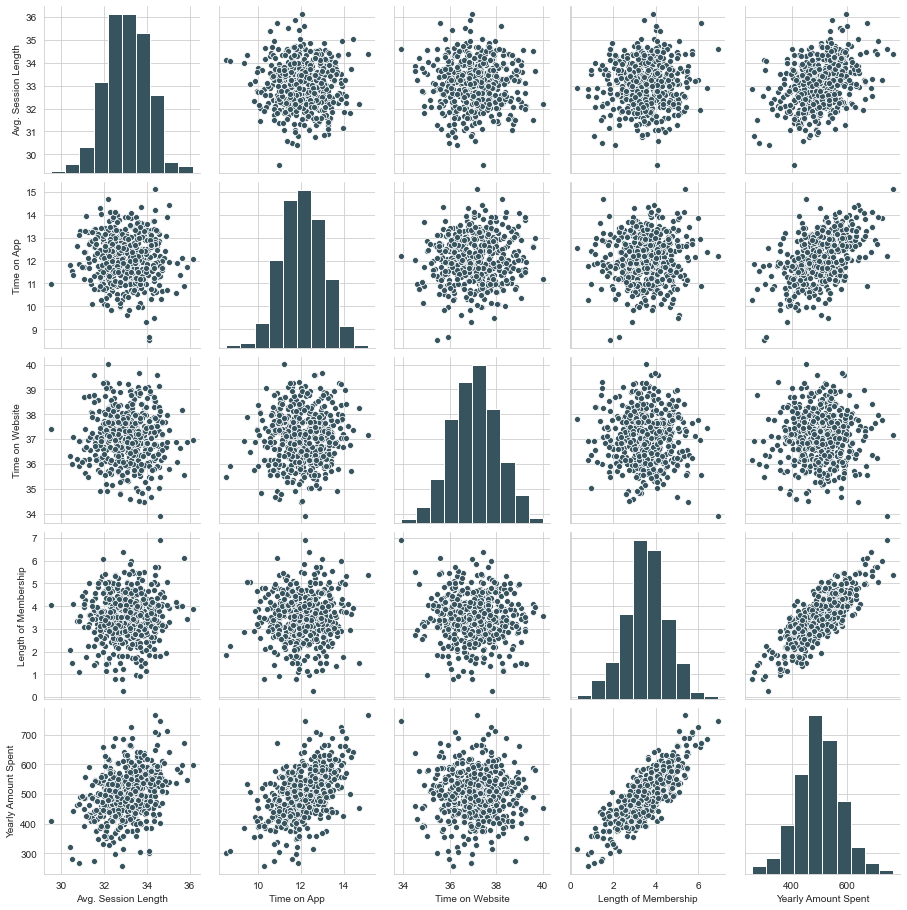

In [7]:
sns.pairplot(customers)

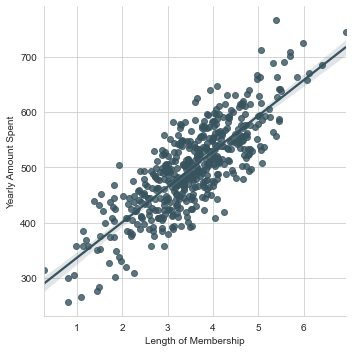

In [8]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Dados para aprendizagem e teste do modelo :

In [9]:
y = customers['Yearly Amount Spent']

In [11]:
y.shape

(500,)

In [10]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [12]:
X.shape

(500, 4)

## Uso da classe train_test_split para dividir a base de dados em aprendizagem e teste :

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
y_test.shape

(150,)

## Aprendizagem do modelo :

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

## Coeficientes 'w' do modelo :

In [23]:
print('Coeficientes: \n', lm.coef_)
print('Bias: \n', lm.intercept_)

Coeficientes: 
 [25.98154972 38.59015875  0.19040528 61.27909654]
Bias: 
 -1047.9327822502382


## Estimando valores da variável objetivo 'y' :

In [27]:
predictions = lm.predict(X_test)

In [28]:
predictions.shape

(150,)

Text(0, 0.5, 'Y estimado')

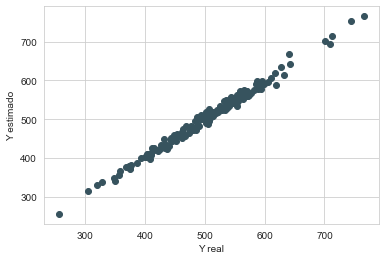

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y real')
plt.ylabel('Y estimado')

## Métricas para validação do modelo :

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430815
MSE: 79.81305165097429
RMSE: 8.933815066978624


## Medição dos erros

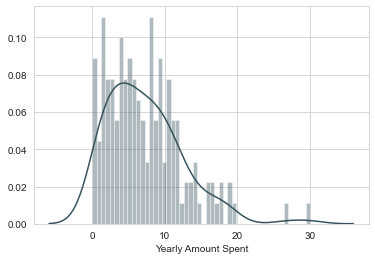

In [32]:
sns.distplot((abs(y_test-predictions)),bins=50);

## Interpretação dos coeficientes :

In [33]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeficiente :']
coeffecients

,Coeficiente :
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
